<a href="https://colab.research.google.com/github/mehrnaznz/FirstTest/blob/main/Session%205/Assignment%204.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MPM 200: Assignment 4

### Due 29th October 2025 9AM

* For all questions, you must show your work. This will enable us to understand your thought process, give partial credit, and prevent crude cheating.
* Please make sure that you are not simply copying each other's code, but rather striving to understand each other's work and learn from it
* Additionally, please provide the R code at the end of your solution and include R commands along with R outputs. This will help to describe your solutions more clearly.

# Section 0: R

**Q0: install package "beepr" from CRAN and use *beep()* function to make "MARIO" sound.**

Make sure you have the following packages installed.
1. Tidyverse
2. dplyr
3. ggplot2
4. sjPlot

## Will the hummers survive?

#### As a wildlife veterinarian, you are interested in understanding the trends in hummingbird survival in California. To achieve this, you collaborate with several regional rehabilitation centers and develop a dataset of hummingbird rehabilitation cases, based on records maintained by these centers.


#### The data recorded wasthe  following:

Disposition_binary: Died or Released  
Place: Rehabilitation center  
F_Aid: First aid provided  
Species_e: Hummingbird species: ANHU == Anna's Hummingbirds, NonSselasphorus: non-orange hummingbirds that are not identified till species level, Selasphorus: Hummingbirds that are from Selasphorus genus but not identified until species level, BCHU: Black-chinned hummingbirds  
Sex_e:  
Age_e:  
Brought_in_after: Number of days it was with the rescuer before it came to a  rehabilitation center  
season: season when it was admitted  
r: reason for admission  
Green_Orange: species classification: Green or Orange bird  
ID: unique ID given to the  individual bird


### Your aim is to identify factors that affect the survival or successful release of hummingbirds once they are admitted to the rehabilitation center. You are expected to do the following:
1. Tabulate and plot the distribution of your outcome variable
2. Identify covariates that you think (based on your general understanding) and explore individual covariates
3. Plot/tabulate individual covariates with your outcome
4. Run univariate generalized linear models
5. Run backward elimination to find the best-fitting model
6. Run forward addition to finding the best fitting model

# Section 1
### Reading the data
Here, you will read the **Hummingbird_data.csv** file dataset and create a random sample of it. You will use this random sample of the dataset to complete the rest of the exercise.


**Q1. read the Hummingbird_data.csv file in R**   
2 points

In [29]:
#read the csv file and
data  = read.csv("/content/Hummingbird_data.csv", stringsAsFactors = FALSE)


In [30]:
colnames(data)

[1] "Admitted"           "Disposition_binary" "Place"             
 [4] "F_Aid"              "Species_e"          "Sex_e"             
 [7] "Age_e"              "Brought_in_after"   "season"            
[10] "r"                  "Green_Orange"       "ID"

**Q2. How many rows and columns are in the datafame**  
1 point

rows: 6908 columns: 12

### Checking the Structure of Each Column and Identifying Data Types
* Use the `str()` function to view the structure of the dataframe.  
*
Use the` sapply(`) function with class() to identify the data types of each column
*
Discuss any observations or potential issues with the data types.

In [31]:
str(data)


'data.frame':	6908 obs. of  12 variables:
 $ Admitted          : chr  "1/2/1991" "1/2/1991" "1/4/1991" "1/5/1991" ...
 $ Disposition_binary: chr  "Died" "Released" "Died" "Died" ...
 $ Place             : chr  "Lindsey" "Lindsey" "Lindsey" "Lindsey" ...
 $ F_Aid             : chr  "No" "Yes" "No" "No" ...
 $ Species_e         : chr  "ANHU" "ANHU" "ANHU" "ANHU" ...
 $ Sex_e             : chr  "Female-like " "Female-like " "Female-like " "Female-like " ...
 $ Age_e             : chr  "adult-like" "adult-like" "adult-like" "adult-like" ...
 $ Brought_in_after  : int  1 0 0 4 0 0 0 0 0 0 ...
 $ season            : chr  "Winter" "Winter" "Winter" "Winter" ...
 $ r                 : chr  "found on the ground" "unknown" "suspect torpor-like state" "unknown" ...
 $ Green_Orange      : chr  "Non-selasphorus spp." "Non-selasphorus spp." "Non-selasphorus spp." "Non-selasphorus spp." ...
 $ ID                : chr  "1_ANHU" "2_ANHU" "3_ANHU" "4_ANHU" ...


In [32]:
# Identify data types of each column
data_types = sapply(data, class)
print(data_types)

          Admitted Disposition_binary              Place              F_Aid 
       "character"        "character"        "character"        "character" 
         Species_e              Sex_e              Age_e   Brought_in_after 
       "character"        "character"        "character"          "integer" 
            season                  r       Green_Orange                 ID 
       "character"        "character"        "character"        "character" 


Next step is to create a random subset of the given data.   
Use the given code to create the subset data.

In [33]:
library(dplyr)
model_data = sample_n(data, 5000)

**Use *model_data* dataframe to answer remainder questions of the assingment.**

**Q3: How many rows and columns are present in your data frame currently?  
1 Point**

rows: 5000 columns:12

**Q4: How many columns are categorical variables, and how many are continuous variables in the dataset?  
2 Points**

categorical: 9
continuous: 1

**Q5: Submit your model_data file along with your submission.  
Save it as "Hummingbird_data_YOURNAME.csv" and submit it    
2 Points**

In [34]:
write.csv(model_data, "Hummingbird_data_MehrnazNiazi.csv", row.names = FALSE)

In [35]:
library(ggplot2)

# Section 2
## Rehabilitation Center and number of hummingbirds
Lets see how we can explore how many birds were admitted to each rehabilitation center (represented by column Place).  
We will use functions from` dply`r to generate summary tables and plot them using` GGplot`2

In [36]:
model_data%>%
group_by(Place)%>%
summarise(count = n_distinct(ID))

Place,count
<chr>,<int>
Lindsey,4161
Santa Barbara,61
malibu,778


In [37]:
rehab = model_data  %>%
group_by(Place)%>%
summarise(count = n_distinct(ID))

In [38]:
p = ggplot(rehab, aes(x = Place, y = count)) +
geom_bar(stat="identity", color = 'steelblue', fill = 'steelblue')+
xlab('Rehabilitation center')+ ylab('number of hummingbirds')+
labs(title = "Number of rescued hummingbirds")

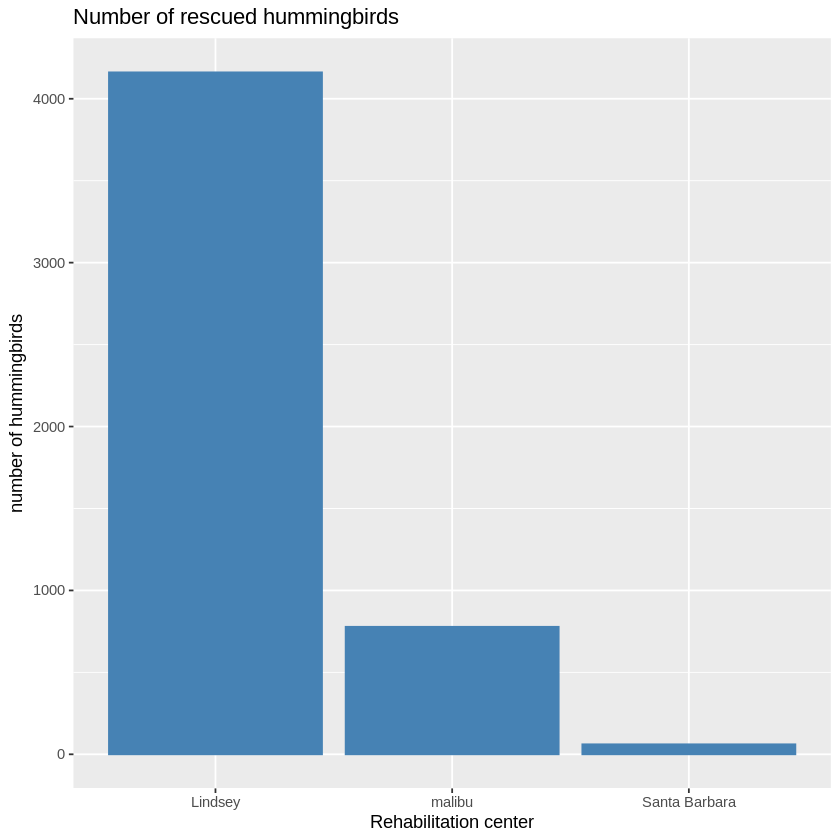

In [39]:
p

**Q6: Please save this plot to a PDF file and submit it along with your assignment. Ensure that the size of the plot is 4 inches wide and 3 inches tall.  
Point: 2**  

In [40]:
pdf("rehab_hummingbirds_plot.pdf", width = 4, height = 3)
print(p)
dev.off()


agg_record_99245982 
                  2

**Q7: Please explain the code above in words, including what each line of R code is doing, starting from the code that creates the "Rehab" object until the plot.  
Points: 2**  

group_by(Place)--> groups the dataset by rehabilitation center.

summarise(count = n_distinct(ID))--> calculates the number of unique birds treated at each center.

ggplot(rehab, aes(...))--> initializes the plot using the summary table.

geom_bar(stat = "identity")--> creates bars whose heights represent the actual counts (not computed automatically).

xlab() and ylab()--> label the axes.

labs(title = ...)--> gives the plot a descriptive title.

The object p --> stores the plot, which I then saved to PDF.

# Section 3

## Key variables that affect the survival of hummingbirds  

#### Do the following steps
1. List 5 covariates from data columns that you think might affect the survival.   
2. For each variable, create a table showing the number of birds that survived and died for each subcategory for the covariate.  
3. To do that, create a table first with COVARIATE, Disposition_binary, and unique IDs
4. Then use that data frame to generate bar plots and use  `facet_grid` function in `GGPlot`

**Q8: What is your observation based on those tables and plots? Do you think all those are associated with the final disposition of hummingbirds? Any suggestions for statistically testing them?  
Points: 5**

Based on the tables and bar plots for Age_e, Sex_e, Place, F_Aid, and season, several patterns appear related to hummingbird survival.

Age_e shows noticeable differences between categories; some age groups have higher proportions of death, suggesting that age may influence survival. Sex_e appears less strongly associated, as male-like and female-like categories often show similar release vs. death patterns. Place (rehabilitation center) shows clear variation: some centers have much higher release rates, while others have more deaths, possibly reflecting differences in caseload or resources. F_Aid is strongly associated with survival: birds that received first aid tend to have higher release proportions. Season also appears to matter, with some seasons showing higher mortality, likely due to migration stress or weather conditions.

Not all covariates show equal association, but Age_e, Place, F_Aid, and season show stronger visual patterns than Sex_e.

For statistical testing, chi-square tests or Fisher’s exact tests could evaluate associations for categorical variables, and logistic regression could quantify the effects more formally.


In [54]:
df = model_data  %>%
group_by(Age_e, Disposition_binary)%>%
summarise(count = n_distinct(Age_e, Disposition_binary))

`summarise()` has grouped output by 'Age_e'. You can override using the
`.groups` argument.


In [42]:
df

function (x, df1, df2, ncp, log = FALSE) 
{
    if (missing(ncp)) 
        .Call(C_df, x, df1, df2, log)
    else .Call(C_dnf, x, df1, df2, ncp, log)
}
<bytecode: 0x5cdb17ac2820>
<environment: namespace:stats>

In [56]:
p + facet_grid(. ~ FACET_column)+ coord_flip()

ERROR while rich displaying an object: Error in `combine_vars()`:
! At least one layer must contain all faceting variables: `FACET_column`
✖ Plot is missing `FACET_column`
✖ Layer 1 is missing `FACET_column`

Traceback:
1. sapply(x, f, simplify = simplify)
2. lapply(X = X, FUN = FUN, ...)
3. FUN(X[[i]], ...)
4. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
5. tryCatchList(expr, classes, parentenv, handlers)
6. tryCatchOne(expr, names, parentenv, handlers[[1L]])
7. doTryCatch(return(expr), name, parentenv, handler)
8. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .

Age_e,Disposition_binary,count
<chr>,<chr>,<int>
Nestling,Died,424
Nestling,Released,764
adult-like,Died,2804
adult-like,Released,1008


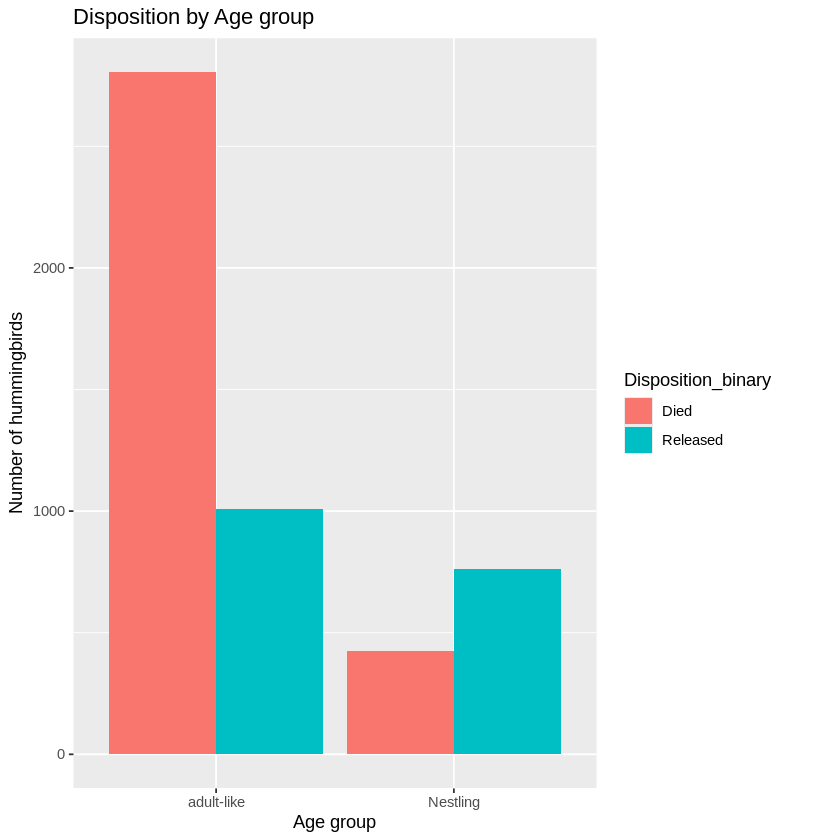

In [44]:
df_age = model_data %>%
  group_by(Age_e, Disposition_binary) %>%
  summarise(count = n_distinct(ID), .groups = "drop")

df_age

ggplot(df_age, aes(x = Age_e, y = count, fill = Disposition_binary)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(title = "Disposition by Age group",
       x = "Age group",
       y = "Number of hummingbirds")


Sex_e,Disposition_binary,count
<chr>,<chr>,<int>
Female-like,Died,2363
Female-like,Released,884
Male,Died,435
Male,Released,124
unknown,Died,430
unknown,Released,764


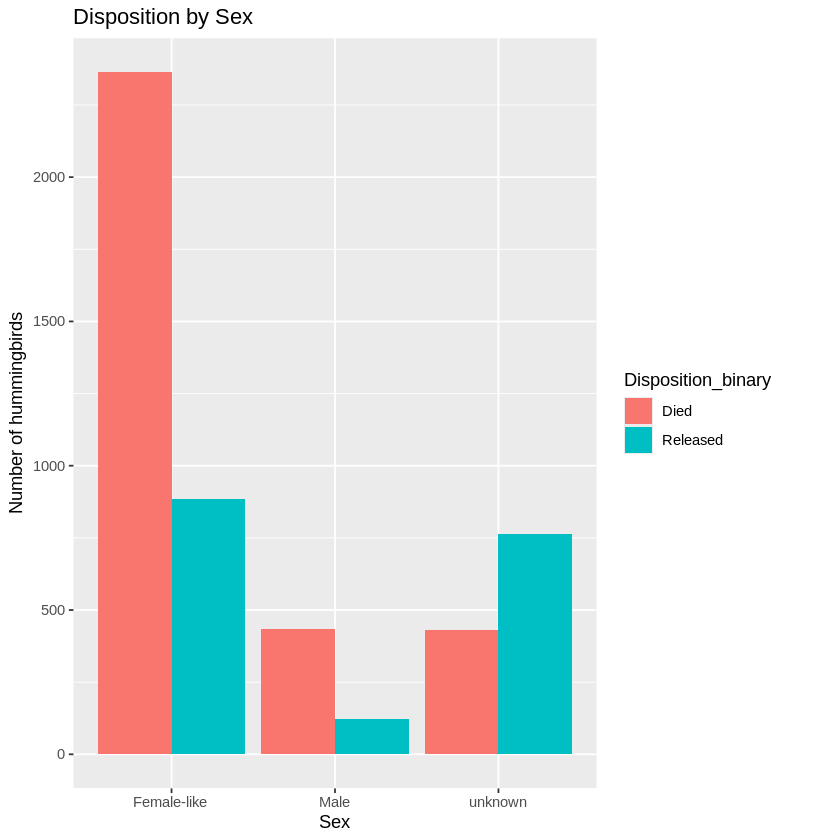

In [46]:
df_sex = model_data %>%
  group_by(Sex_e, Disposition_binary) %>%
  summarise(count = n_distinct(ID), .groups = "drop")

df_sex

ggplot(df_sex, aes(x = Sex_e, y = count, fill = Disposition_binary)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(title = "Disposition by Sex",
       x = "Sex",
       y = "Number of hummingbirds")


Place,Disposition_binary,count
<chr>,<chr>,<int>
Lindsey,Died,2706
Lindsey,Released,1455
Santa Barbara,Died,35
Santa Barbara,Released,26
malibu,Died,487
malibu,Released,291


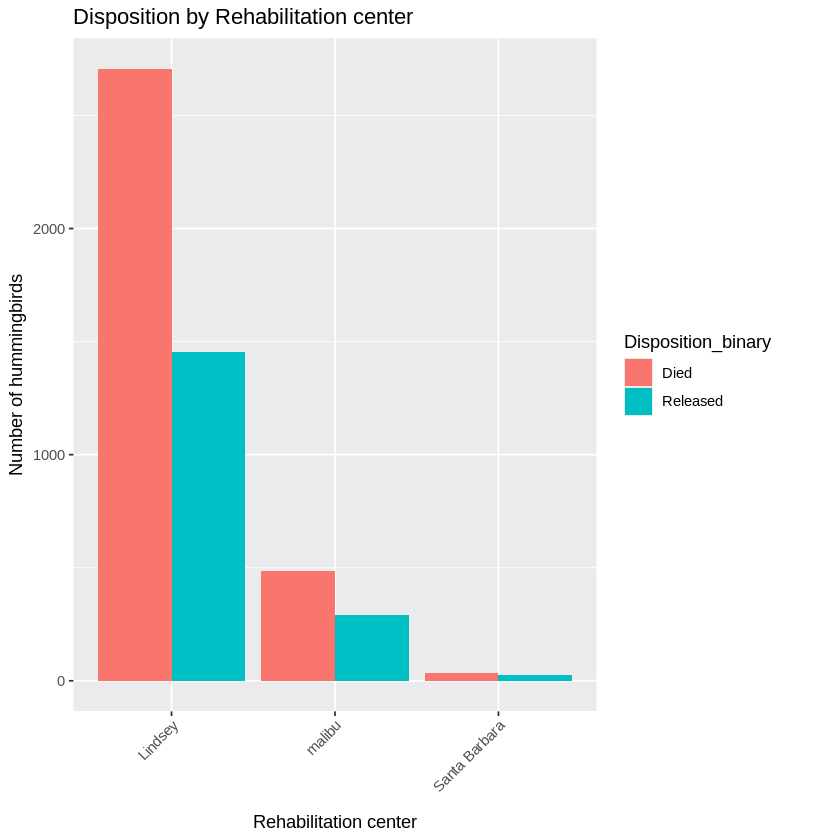

In [47]:
df_place = model_data %>%
  group_by(Place, Disposition_binary) %>%
  summarise(count = n_distinct(ID), .groups = "drop")

df_place

ggplot(df_place, aes(x = Place, y = count, fill = Disposition_binary)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(title = "Disposition by Rehabilitation center",
       x = "Rehabilitation center",
       y = "Number of hummingbirds") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))


F_Aid,Disposition_binary,count
<chr>,<chr>,<int>
No,Died,2110
No,Released,1186
Yes,Died,1118
Yes,Released,586


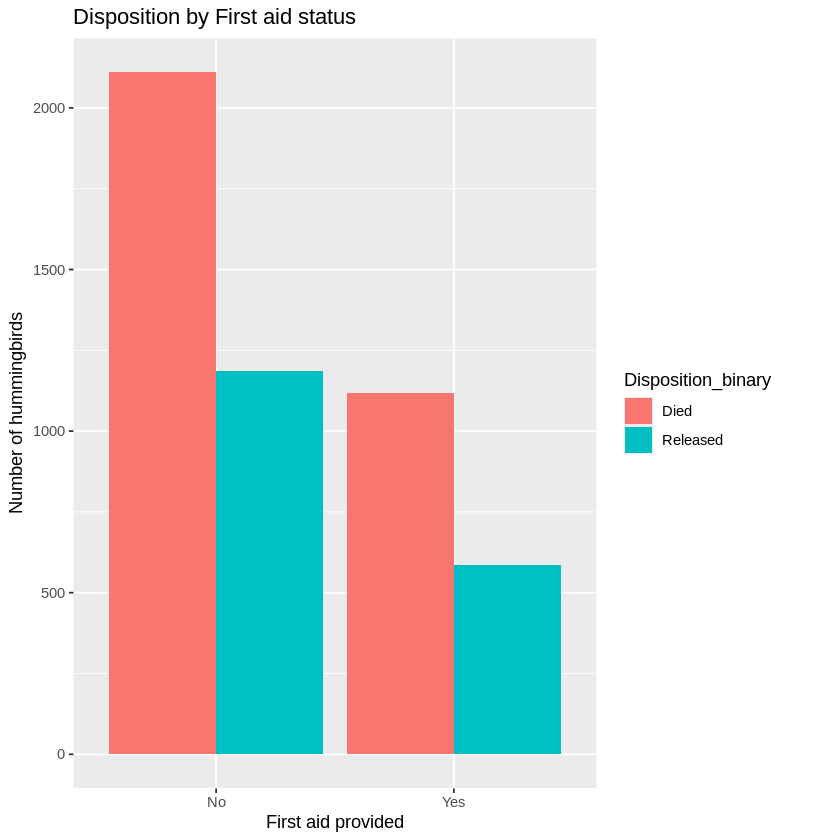

In [48]:
df_faid = model_data %>%
  group_by(F_Aid, Disposition_binary) %>%
  summarise(count = n_distinct(ID), .groups = "drop")

df_faid

ggplot(df_faid, aes(x = F_Aid, y = count, fill = Disposition_binary)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(title = "Disposition by First aid status",
       x = "First aid provided",
       y = "Number of hummingbirds")


season,Disposition_binary,count
<chr>,<chr>,<int>
Fall,Died,373
Fall,Released,66
Spring,Died,1355
Spring,Released,936
Summer,Died,935
Summer,Released,585
Winter,Died,565
Winter,Released,185


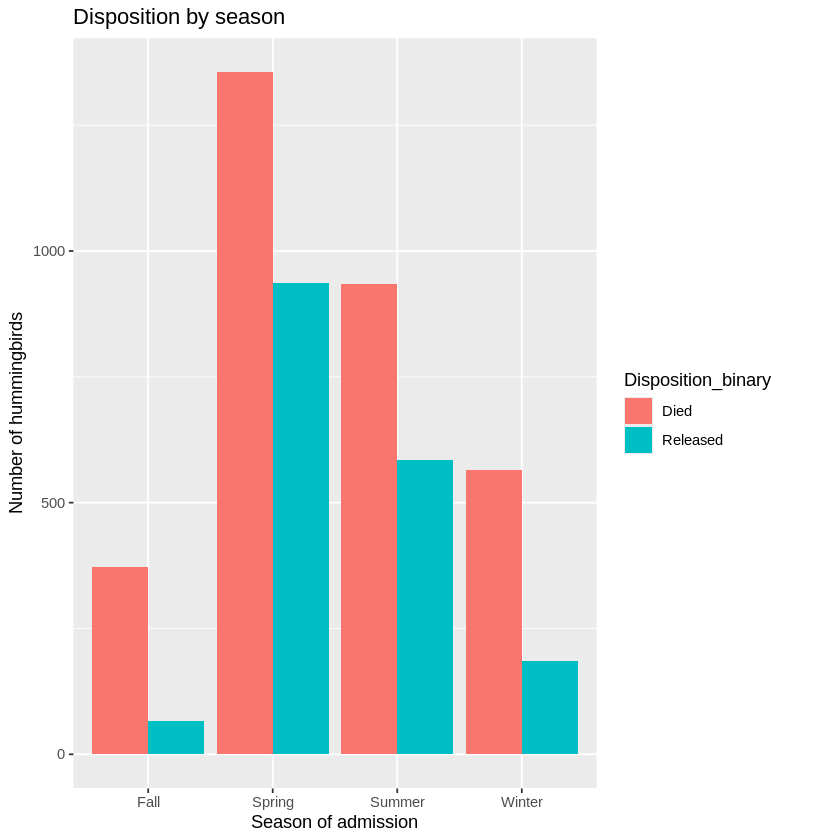

In [49]:
df_season = model_data %>%
  group_by(season, Disposition_binary) %>%
  summarise(count = n_distinct(ID), .groups = "drop")

df_season

ggplot(df_season, aes(x = season, y = count, fill = Disposition_binary)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(title = "Disposition by season",
       x = "Season of admission",
       y = "Number of hummingbirds")


## Calculating Proportions

#### Q10: Calculate the proportion of hummingbirds that were released versus those that died for each rehabilitation center.
* Use the `model_data` dataframe to calculate these proportions.
*
Create a table showing the proportions for each rehabilitation center (denoted by column `Place`)   .*
Plot a bar chart to visualize these proportions.

Place,Disposition_binary,count,proportion
<chr>,<chr>,<int>,<dbl>
Lindsey,Died,2706,0.6503244
Lindsey,Released,1455,0.3496756
Santa Barbara,Died,35,0.5737705
Santa Barbara,Released,26,0.4262295
malibu,Died,487,0.6259640
malibu,Released,291,0.3740360


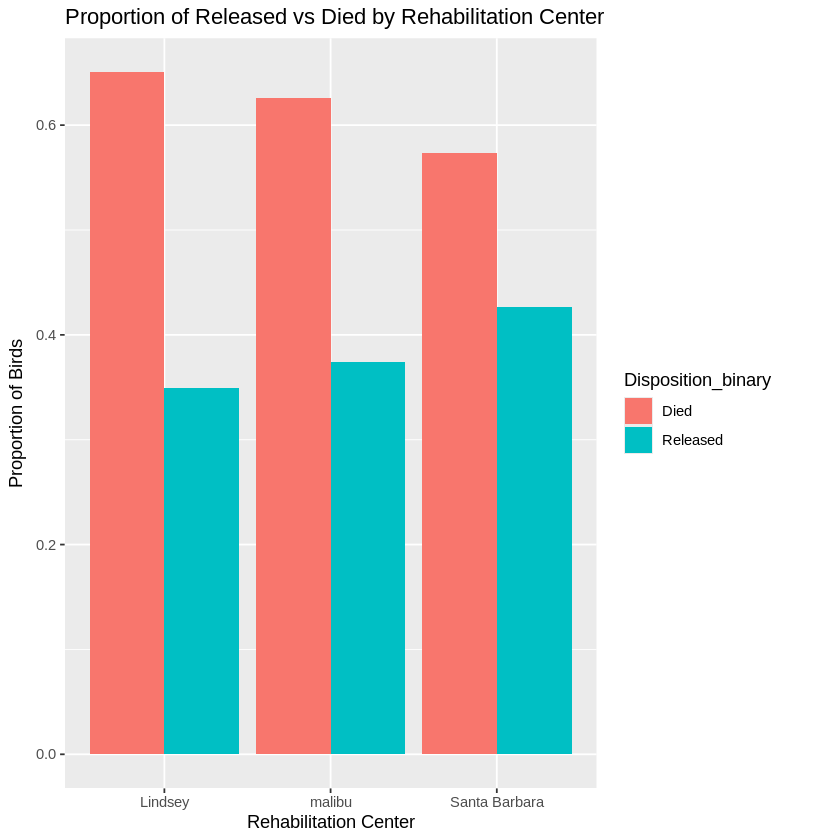

In [62]:
# Calculate proportions
proportions = model_data %>%
  group_by(Place, Disposition_binary) %>%
  summarise(count = n_distinct(ID), .groups = "drop") %>%
  group_by(Place) %>%
  mutate(proportion = count / sum(count))
proportions


# Plot the proportions
ggplot(proportions, aes(x = Place, y = proportion, fill = Disposition_binary )) +
  geom_bar(stat = "identity", position = "dodge") +
  xlab("Rehabilitation Center") +
  ylab("Proportion of Birds") +
  labs(title = "Proportion of Released vs Died by Rehabilitation Center" )

### Merging Species into Groups/Families  
#### Q11: Merge the Species_e column into broader categories (e.g., Anna's Hummingbirds, Selasphorus genus, Non-selasphorus, Black-chinned Hummingbirds).
* Anna's Hummingbird, Black-chinned Hummingbird and "non-selasphorous' hummingbirds need to be classified as Non-selasphorus
* All Selasphorus species should be classified as `Selasphorus`
* Create a new column `Species_group` that categorizes the species into these broader groups.
* Tabulate and plot the distribution of hummingbirds by these new species groups.
* Analyze how the survival rates differ across these species groups.

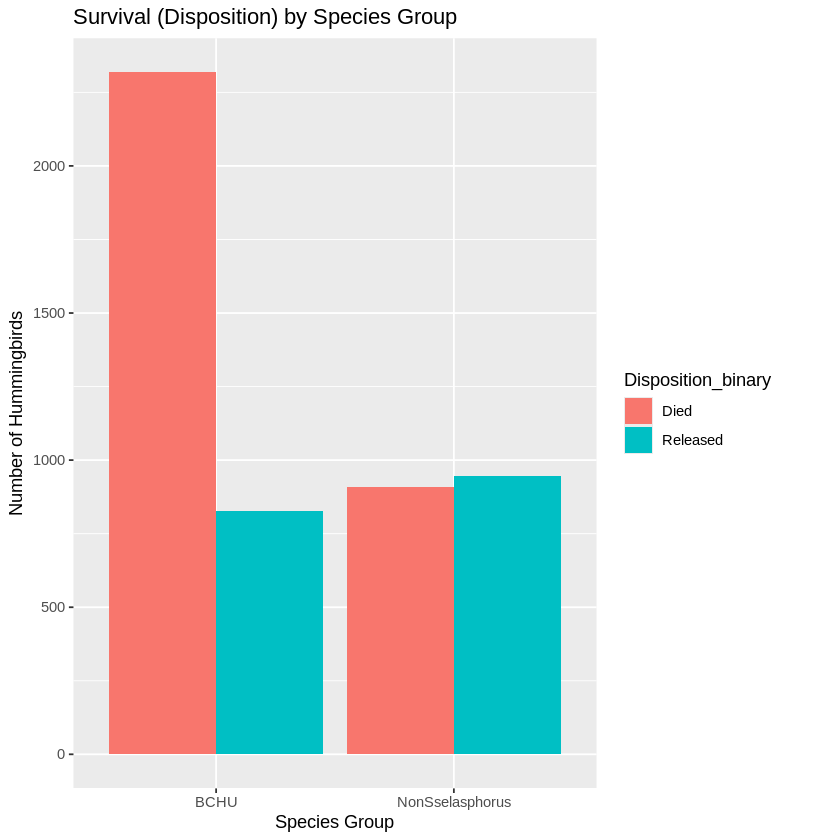

In [63]:
## Hint: think about the logic. How would you quickly classify these species into multiple groups using ifelse statement?

model_data$Species_group = ifelse(model_data$Species_e == "ANHU", "BCHU", "NonSselasphorus")

# Tabulate and plot the distribution
species_distribution = model_data %>%
  group_by(Species_group, Disposition_binary) %>%
  summarise(count = n_distinct(ID), .groups = "drop")

ggplot(species_distribution,
       aes(x = Species_group, y = count, fill = Disposition_binary)) +
  geom_bar(stat = "identity", position = "dodge") +
  xlab("Species Group") +
  ylab("Number of Hummingbirds") +
  labs(title = "Survival (Disposition) by Species Group" )

### Q12 Analyze the Trend of Hummingbird Admissions Over Time
* Convert the `Admitted` column to a date format.
*
Summarize the trend of hummingbird admissions over time
*
Plot the trend using `ggplot2`.

In [64]:
model_data$Admitted_date = as.Date (model_data$Admitted, format = "%m/%d/%Y)

ERROR: Error in parse(text = input): <text>:1:37: unexpected input
1: model_data$Admitted_date = as.Date(__
                                        ^


Q12a Please explain the argument `format` in code above

The next step is to summarize the number of birds seen in each month and similarly in each year.

In [ ]:
admissions_by_month = ____ %>%
  mutate(Admitted_month = format(Admitted_date, "%Y-%m")) %>%
  group_by(Admitted_month) %>%
  summarise(_____)

admissions_by_year = _____ %>%
  mutate(______ = format(______, "%Y")) %>%
  group_by(_______) %>%
  summarise(_______)

Finally, we can use `ggplot` to plot these timelines.

In [ ]:
# Plot admissions by month
p_month = ggplot(admissions_by_month, aes(x = _______, y = _____)) +
  geom_bar(_____________________________) +
  xlab(_______) +
  ylab(_______) +
  labs(_______________________)

In [ ]:
## Plot similar timeline for Yearly admissions of Hummingbirds